### Código que  por cada columna de datos se intenta predecir su incremento en F dias usando los  incrementos que ha habido de otras columnas  desde hace P dias.  El conjunto de columnas que se usan para predecir es multiplo de p ya que se utilizan todos los pasados posibles de una columna.


#### Antes de ejecutar este código hay que  ejecutar el llamado limpiarCeros pues si en los datos hay algun cero, se prodicira un error  al llevar a cabo la division por 0 y dar de resultado infinito

In [1]:
#prefix ='C:/rafa/docencia/1819/tfg/keycapital'
prefix ='C:/Users/Celia/Desktop/4º/TFG/codigo/python/resultados'
column = 'CCMP_Index_Open'
#column = 'CCMP_Index_Open'
#file = 'rawVol_open.csv'
file = 'raw_open.csv'
import csv
import sys

import numpy as np
import math
import pandas as pd
print(pd.__version__)
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import sklearn
print(sklearn.__version__)
from sklearn.ensemble import VotingRegressor
from math import sqrt


uno = pd.read_csv(file,index_col=False)
#dos=pd.read_csv(prefix+"/raw/raw.csv",index_col=False)

#d = pd.concat([dos[column], uno], axis=1, sort=False)
d = uno
#prefix += '/resultados'


0.23.4
0.21.0


In [6]:
def pega(sentence):
    sent_str = ""
    for i in sentence:
        sent_str += str(i)
    return sent_str
def cat(outfilename, line):
    with open(outfilename, 'w') as outfile:
            outfile.write(line)
            outfile.close()
def cat2(outfilename, line):
    with open(outfilename,'a') as outfile:
            outfile.write(line)
            outfile.close()
codigo =10
prueba_numero =5

f = 30
p = 20

path = pega([prefix,'/errorNaive',codigo,prueba_numero,'.txt'])

cat(path,pega(["p: ",p," f: ",f,"\n"]))
errores =pega([prefix,'/rmse',codigo,prueba_numero,'.txt'])
cat(errores,pega(["Rmse mejores",prueba_numero,"\n"]))
#archivo registro de pruebas
n=pega([prefix,'/registro_pruebas',codigo,'.txt'])
cat2(n,pega(['nº',prueba_numero ,' columna_predecir: '+column,"p: ",p," f: ",f," columnas: ",len(d.columns)," n: ",3,"\n"]))


max_col = 3




In [7]:
import warnings
import time
from random import randint
from sklearn.linear_model import Perceptron
warnings.filterwarnings('ignore')
lista = list(d.columns.values)
for col in list(d.columns.values):
    #print(col)
    if(col==column):# probar solo con la columna elegida
        print('Prediciendo',col,' fichero',file)
        present = d[(p):(len(d)-f)][col].reset_index()
        future = d[(f+p):len(d)][col].reset_index()
        # la etiqueta es el % de incremento en f días (saltando los p+1 primeros)

        label1 = future.subtract(present, fill_value=0).reset_index()
        label2 = (label1[col]/present[col]).reset_index()
        label=label2.drop(label2.columns[[0]], axis='columns')


        array = [0] * len(label)
        zeros = pd.DataFrame(data=array)

        a = label.values

        rmse =sqrt(mean_squared_error(array, a))
        cat2(path,pega([col," ", rmse,"\n"]))
        # hasta aqui columna label y error del naive
        
        rmse_up_to_now = 1
        columns= []
        column_names = []

        n = 0
        puntoFijo = False
        
        # miemtras que no se lleven el máximo de columnas y siga mejorando
        while n < max_col and (not puntoFijo):
            print(pega(["n=", n]))
            ndf = columns
            ini = 0
            fin = len(d.columns)
            #fin =2
            #recorre todas las columnas
            cambios = 0
            for i in np.arange(ini, fin):
               
                #nombre de la columna
                nombres = pega([lista[i],2])
                #si esa columna no ha sido cogida ya antes
               
                if not (nombres in column_names): #and (nombres != col):
                    start = time.time()
                    print(i,nombres)
                    pred = i
                    s = np.arange(1, len(d)+1)# filas de la tabla
                    vs = np.arange(0, p-1) # pasados a utilizar es ahasta p-1 porque no incluyepe la funcion arange
                    name = list(d.columns.values)[pred]
                    names = []
                    #para la columna  i con la que quiero hacer la prediccion  en names estan los posibles pasados de esa columna a usar
                    for v in vs:
                        names.append(pega([name, (p-v)]))
                    df=pd.DataFrame(columns=names)
                    # desde el dia p+1(cosas de indices) hasta el final menos futuro --> tabla
                    for i in np.arange(p,len(d)-f):
                        #para cada filla nrwo representa la fila actual
                        nrow=[]
                        #rellenar las columnas de (EuroPasado10, EuroPasado9, EuroPadaso8....)
                        for v in vs:
                            #calcular los incrementos que ha habido  en un marco temporal de 10 dias atras
                            #d[ el dia a predecir - (p-v= rango de 10 a 1) dias atras]
                            nrow.append(((d.iloc[i-(p-v)+1][pred])-(d.iloc[i-(p-v)][pred]))/ (d.iloc[i-(p-v)][pred]))
                        df.append(nrow)
                        df = df.append(pd.Series(nrow, index=df.columns ), ignore_index=True)
                     
                    
                    
                    # se añade el mejor conjunto de columnas de la iteracion anterior de n si no es vacio
                    if(len(columns)!=0):
                        df=pd.concat([columns, df], axis=1, sort=False)
                    
                    # crear la matriz de datos con label
                    datos = pd.concat([label, df], axis=1, sort=False)
                    end = time.time()
                    tc = end-start
                    
                   
                    
                    
                    #-----------------EVALUACION---------------------------------------
                   
                        
                            
                   
                    start = time.time()
                    trainsize=1500 # tamaño de inicion del conjunto de entrenamiento
                    step = 10
                    s =np.arange(trainsize,len(datos)-f,step)
                   
                    predichos = []
                    reales=[]
                    puntos = []
                    cuantos = 100
                    for ensayo in range(cuantos):
                        j = randint(1500, len(datos)-p-f)
                        
                        train = datos[1:j][:]
                        #reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
                        reg2 = MLPRegressor(hidden_layer_sizes=(100,50),activation='logistic')
                        #reg3 = LinearRegression()
                        #ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
                        ereg = reg2 
                        #reg1.fit(train.iloc[:,1:],  train.iloc[:,0:1])
                        #reg2.fit(train.iloc[:,1:],  train.iloc[:,0:1])
                        #reg3.fit(train.iloc[:,1:],  train.iloc[:,0:1])
                        ereg.fit(train.iloc[:,1:], train.iloc[:,0:1])
                        
                        #vr.fit(train.iloc[:,1:], train.iloc[:,0:1])
                        
                        test=datos.iloc[[j+f],1:]
                        Y_pred = ereg.predict(test)
                        real =datos.iloc[[j+f],0:1]
                        
                        valor_p =Y_pred[0]
                        valor_r=real.iloc[0,0]
                        predichos.append(valor_p)
                        reales.append(valor_r)
                        puntos.append(j)
                    
                    
                    rmse =sqrt(mean_squared_error(reales, predichos))
                    
                    
                    #si mejora
                    if(not(np.isnan(rmse)) and rmse<rmse_up_to_now):
                        cambios +=1
                        rmse_up_to_now=rmse
                        ndf= df
                        cat2(errores,pega([col, " con ", name," iteracion", n," ", rmse_up_to_now,"\n"]))
                        print('* ',rmse_up_to_now)
                    end = time.time()
                    t2 = end-start
                    print('    tc: ',tc,'t e ',t2)
                    
                
                        
             
            print(pega(["mejores columnas iteracion: ",n]))
            print(ndf.columns.values)
                  
            # aqui termina la busqueda de la combinacion de pasasdos para las columnas i para predecir la columna col         
            if(cambios>0 ) :
               
                columns = ndf
              
                columns_names = columns.columns.values
                
                print("cambio columnas")
                print(column_names)
                n+=1
            else:
                print("vuelta sin cambios")
                puntoFijo = True
                    
        print("Acabado")
        cat2(errores,pega([col, " acabado ", ndf.columns.values, rmse_up_to_now,"\n"]))
        print(rmse_up_to_now)
        print(ndf.columns.values)
      
    


Prediciendo CCMP_Index_Open  fichero raw_open.csv
n=0
0 EUR_Curncy_Open2
*  0.03893417550573742
    tc:  38.69854283332825 t e  32.59902739524841
1 JPY_Curncy_Open2
*  0.03673149651985367
    tc:  33.74780225753784 t e  27.328511476516724
2 GBP_Curncy_Open2
    tc:  49.08399057388306 t e  26.092714309692383
3 CHF_Curncy_Open2
    tc:  29.97066593170166 t e  24.77592182159424
4 CAD_Curncy_Open2
    tc:  41.76125717163086 t e  26.6178035736084
5 NOK_Curncy_Open2
    tc:  32.5860755443573 t e  26.741148233413696
6 INDU_Index_Open2
    tc:  38.35364079475403 t e  26.019404888153076
7 SPX_Index_Open2
    tc:  51.61996579170227 t e  25.513162851333618
8 CCMP_Index_Open2
    tc:  30.520557403564453 t e  25.49013090133667
9 SPTSX_Index_Open2
    tc:  49.98886156082153 t e  22.876978635787964
10 MEXBOL_Index_Open2
    tc:  26.89832639694214 t e  21.28458595275879
11 UKX_Index_Open2
    tc:  27.151681661605835 t e  22.289416074752808
12 CAC_Index_Open2
*  0.03289611783911818
    tc:  36.36512303

# Mostramos la gráfica

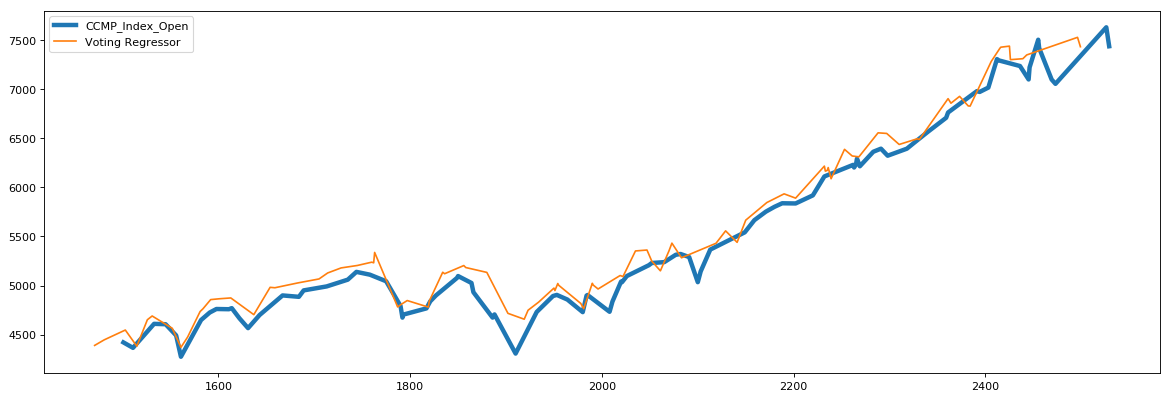

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

rvl = []
pvl = []
pv2l = []
for i in range(len(puntos)):
    k = puntos[i]
    a = d[column][k+f+p]
    b = d[column][k+f+p+f]
    rvl.append(b)
    pvl.append((predichos[i]+1)*(a))
    pv2l.append(a)

# ordenar
rv = list(zip(puntos, rvl))
pv = list(zip(puntos, pvl))  
pv2 = list(zip(puntos, pv2l))  

# converting values to print as set 
rv.sort(key=lambda tup: tup[0])  
pv.sort(key=lambda tup: tup[0])  
pv2.sort(key=lambda tup: tup[0])  
x = [tup[0] for tup in rv]
x2 = [v-f for v in x]
rv = [tup[1] for tup in rv]
pv = [tup[1] for tup in pv]
pv2 = [tup[1] for tup in pv2]



#plt.figure(figsize=(200,100))

plt.plot(x,rv, label=column, linewidth=4)
#plt.scatter(puntos,rv2,)
plt.plot(x2,pv,label='Voting Regressor')
#plt.plot(x2,pv2,label='naïve')
plt.legend(loc='upper left')
plt.savefig(prefix+column+'.png')
plt.show()

NameError: name 'rv2' is not defined

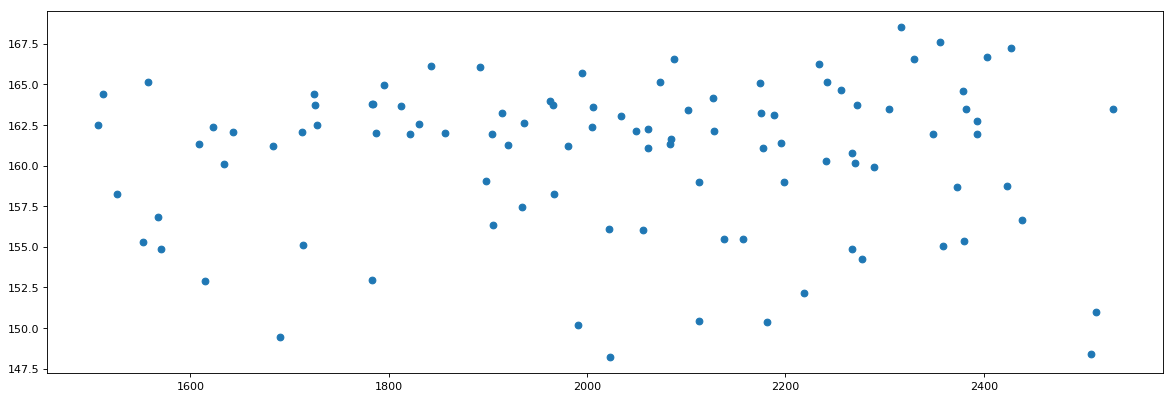

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')


#plt.figure(figsize=(200,100))

plt.scatter(puntos,rv)
plt.scatter(puntos,rv2,)
plt.scatter(puntos,pv,marker='x')
plt.show()

In [1]:

for i in range(len(puntos)):
    print(puntos[i],predichos[i],reales[i])


NameError: name 'puntos' is not defined

In [ ]:

print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
ereg.fit(X, y)

xt = X[19:20]
print(ereg.predict(xt))
plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
print(plt.show())
   
    

In [ ]:
df.iloc[4][5]